In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from GPs.Kernel import Kernel, SqExp, RQ, ExpSine
from GPs.GP import GPCB, GPC

%matplotlib inline

# Binary Classification (using GPCB)

## Generate Training Data

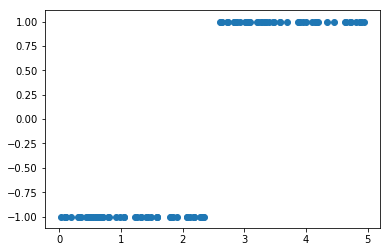

In [2]:
train_size = 50
rng = np.random.RandomState(0)
x = rng.uniform(0, 5, 100)
y = np.array((x > 2.5)*2-1, dtype=int)
plt.scatter(x,y)

## Train the Model

In [3]:
k1 = SqExp(1,1)
gpcb = GPCB(k1)
gpcb.train(x,y)

## Predict

In [4]:
x_star = x

pi_hat_star_mean = gpcb.predict(x_star)
pi_star_mean = gpcb.predict(x_star,False)

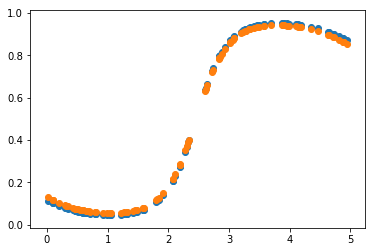

In [5]:
plt.scatter(x_star,pi_hat_star_mean)
plt.scatter(x_star,pi_star_mean)

# Binary Classification (using GPC)

## Generate Training Data

Redo training data such that the value of y is 1 if it belongs to class C and 0 otherwise, where y is a vector of length Cn for n training points. The first n points are for class 1, the next n points are for class 2, and so on.

In [6]:
x_t = x
y_t = np.array((x_t > 2.5), dtype=int)

In [7]:
x = np.append(x_t,x_t)

In [8]:
y_c1 = y_t #1 if it belongs to class 1, 0 otherwise
y_c2 = (y_t-1)*-1 #1 if it belongs to class 2, 0 otherwise

y = np.append(y_c1,y_c2)

## Train the Model

In [9]:
k1 = SqExp(1,1)
gpc= GPC(k1)
gpc.train(x,y,2)

In [10]:
x_star = x_t
pi_star_mean_1 = gpc.predict(x_star,1)
pi_star_mean_2 = gpc.predict(x_star,2)

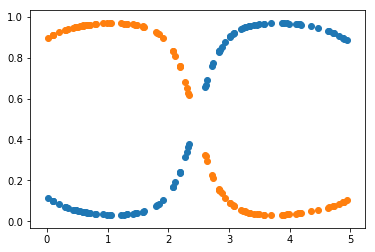

In [11]:
plt.scatter(x_star,pi_star_mean_1)
plt.scatter(x_star,pi_star_mean_2)

In [12]:
lml = gpc.lml()
#print(lml)